In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [2]:
# Hyperparameters
input_neurons = x.shape[1]
hidden_neurons = 4
output_neurons = 1
learning_rate = 0.1
epochs = 10_000

In [9]:
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
b2 = np.zeros((1, output_neurons))

In [4]:
losses = []

for epoch in range(epochs):
    # Forward Propagation
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean(np.square(y - a2))
    losses.append(loss)

    # Backward pass
    dA2 = -(y - a2)
    dZ2 = dA2 * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, dZ2)
    dB2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(a1)
    dW1 = np.dot(x.T, dZ1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * dB2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * dB1

    # Print loss at intervals
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Loss = {loss}')

Epoch 0: Loss = 0.26291577441910563
Epoch 1000: Loss = 0.24010925317841736
Epoch 2000: Loss = 0.1131504730200702
Epoch 3000: Loss = 0.0223849295903377
Epoch 4000: Loss = 0.009683919491691331
Epoch 5000: Loss = 0.005845492291370793
Epoch 6000: Loss = 0.004100524285404975
Epoch 7000: Loss = 0.00312598761842371
Epoch 8000: Loss = 0.0025110690063937045
Epoch 9000: Loss = 0.0020905738364353603


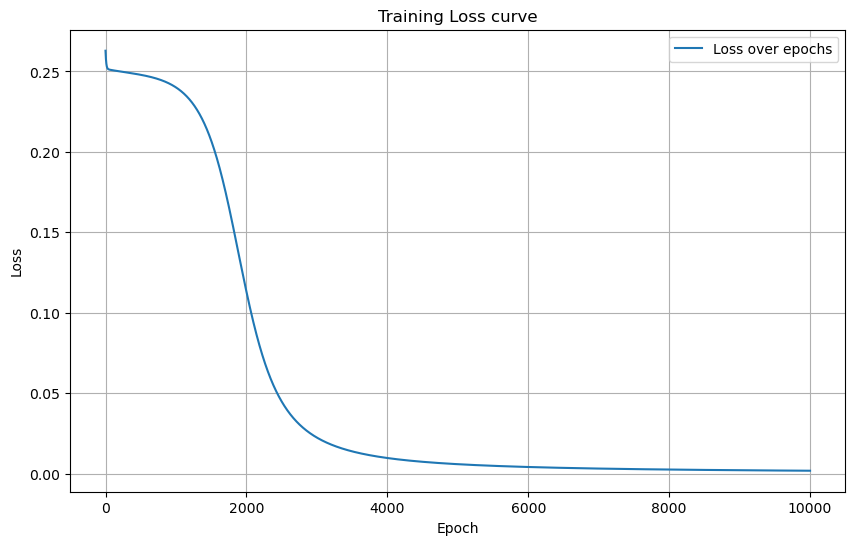


Final predictions:
Input: [0 0], Predicted: 0.0278, Actual: 0
Input: [0 1], Predicted: 0.9565, Actual: 1
Input: [1 0], Predicted: 0.9583, Actual: 1
Input: [1 1], Predicted: 0.0524, Actual: 0

Predicted classes:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


In [7]:
#Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss over epochs")
plt.title("Training Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Testing the trained model
print("\nFinal predictions:")
A1 = sigmoid(np.dot(x, W1) + b1)
A2 = sigmoid(np.dot(A1, W2) + b2)

for i in range(len(x)):
    print(f"Input: {x[i]}, Predicted: {A2[i][0]:.4f}, Actual: {y[i][0]}")

# Classify predictions (round to nearest integer)
predicted_classes = (A2 > 0.5).astype(int)
print("\nPredicted classes:")
for i in range(len(x)):
    print(f"Input: {x[i]}, Predicted: {predicted_classes[i][0]}, Actual: {y[i][0]}")



